### Серик Иван Никитич РТ5-61Б
### РК1 по ТМО 

#### Вариант 18 [РК1](https://github.com/ugapanyuk/courses_current/wiki/TMO_RK_1)
#### Задача:
3. Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?
#### Датасет:
2. [load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

In [83]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

In [84]:
# Загрузка датасета
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Выведем информацию о данных
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

#### Так как датасет содержит данные только числового типа, необходимо создать новый категориальный признак (pandas предоставляет cut для разбиения числовых данных по интервалам)

In [85]:
df['target'] = wine.target

# Создадим искусственный категориальный признак на основе 'alcohol'
df['alcohol_level'] = pd.cut(df['alcohol'], 
                           bins=[0, 12, 13.5, 15],
                           labels=['low', 'medium', 'high'])
# Выведем обновленную информацию о данных
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

print("\nКоличество строк по уровням алкоголя:")
print(df['alcohol_level'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

#### Выполним масштабирование с помощью MinMaxScaler 
#### и получим новые значения в диапазоне от 0 до 1.


До масштабирования:
count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: malic_acid, dtype: float64

После масштабирования:
count    178.000000
mean       0.315484
std        0.220780
min        0.000000
25%        0.170455
50%        0.222332
75%        0.462945
max        1.000000
Name: malic_acid_scaled, dtype: float64


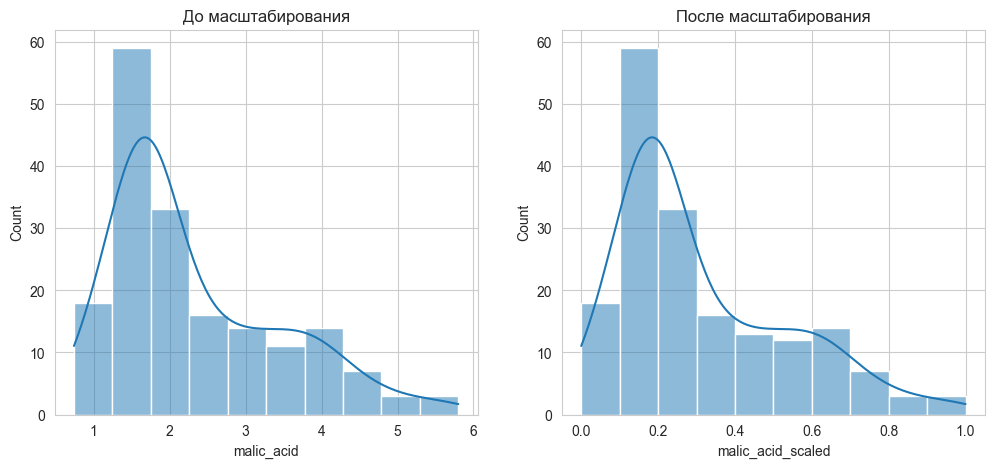

In [86]:
# Масштабирование с помощью MinMaxScaler
scaler = MinMaxScaler()
df['malic_acid_scaled'] = scaler.fit_transform(df[['malic_acid']])

print("\nДо масштабирования:")
print(df['malic_acid'].describe())
print("\nПосле масштабирования:")
print(df['malic_acid_scaled'].describe())

# Визуализация до и после масштабирования
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['malic_acid'], kde=True)
plt.title('До масштабирования')
plt.subplot(1, 2, 2)
sns.histplot(df['malic_acid_scaled'], kde=True)
plt.title('После масштабирования')
plt.show()

#### Выполним преобразование категориальных признаков в количественные
* С помощью LabelEncoder()

LabelEncoder() ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.

In [87]:
label_encoder = LabelEncoder()
df['alcohol_level_encoded'] = label_encoder.fit_transform(df['alcohol_level'])

print("\nLabel Encoding:")
print(df[['alcohol_level', 'alcohol_level_encoded']].head(10))
print("\nКоличество строк по уровням алкоголя:")
print(df['alcohol_level'].value_counts())
print(df['alcohol_level_encoded'].value_counts())


Label Encoding:
  alcohol_level  alcohol_level_encoded
0          high                      0
1        medium                      2
2        medium                      2
3          high                      0
4        medium                      2
5          high                      0
6          high                      0
7          high                      0
8          high                      0
9          high                      0

Количество строк по уровням алкоголя:
alcohol_level
medium    101
high       55
low        22
Name: count, dtype: int64
alcohol_level_encoded
2    101
0     55
1     22
Name: count, dtype: int64


* С помощью OneHotEncoder()

OneHotEncoder() ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

In [88]:
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[['alcohol_level']])

# Преобразуем в плотный массив и создаем DataFrame
onehot_df = pd.DataFrame(onehot_encoded.toarray(), columns=[f"alcohol_level_{cat}" for cat in onehot_encoder.categories_[0]])

# Добавляем к основному DataFrame
df = pd.concat([df, onehot_df], axis=1)

print("\nOne Hot Encoding:")
print(df.filter(regex='alcohol_level_').head(10))

print("\nВид датасета после всех преобразований:")
print(df.head())


One Hot Encoding:
   alcohol_level_encoded  alcohol_level_high  alcohol_level_low  \
0                      0                 1.0                0.0   
1                      2                 0.0                0.0   
2                      2                 0.0                0.0   
3                      0                 1.0                0.0   
4                      2                 0.0                0.0   
5                      0                 1.0                0.0   
6                      0                 1.0                0.0   
7                      0                 1.0                0.0   
8                      0                 1.0                0.0   
9                      0                 1.0                0.0   

   alcohol_level_medium  
0                   0.0  
1                   1.0  
2                   1.0  
3                   0.0  
4                   1.0  
5                   0.0  
6                   0.0  
7                   0.0  
8        

#### Задание для студентов группы РТ5-61Б: для пары произвольных колонок данных построить график "Jointplot".

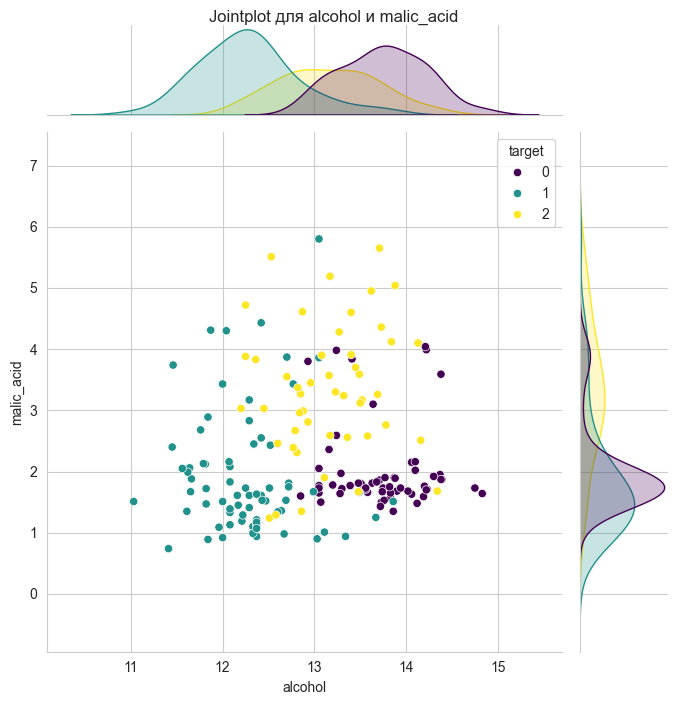

In [89]:
# Jointplot для 'alcohol' и 'malic_acid'
sns.jointplot(data=df, x='alcohol', y='malic_acid', kind='scatter', hue='target', palette='viridis', height=7)
plt.suptitle('Jointplot для alcohol и malic_acid', y=1)
plt.show()

На графике jointplot отображена совместная зависимость между признаками 'alcohol' (алкоголь) и 'malic_acid' (яблочная кислота) в датасете вина, с раскраской точек по целевому признаку 'target' (класс вина).